In [1]:
import pandas as pd

In [2]:
avengers = pd.read_csv("avengers.csv")

In [3]:
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


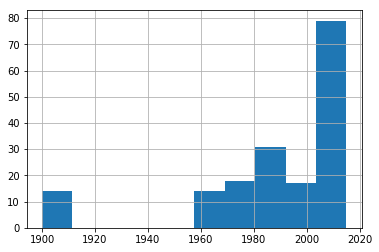

In [4]:
#4

%matplotlib inline
import matplotlib.pyplot as plt
true_avengers = pd.DataFrame()

avengers['Year'].hist()

In [5]:
true_avengers = avengers[avengers["Year"] >= 1960]

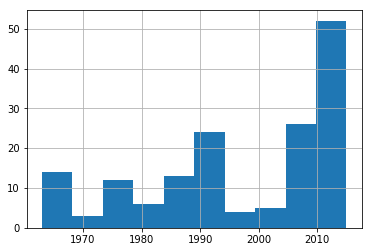

In [53]:
true_avengers["Year"].hist()

# 5

- Create a new column, Deaths, that contains the number of times each superhero died. The possible values for each death field are YES, NO, and NaN for missing data.
- Keep all of the original columns (including Death1 to Death5) and update true_avengers with the new Deaths column.

In [54]:
import numpy as np

fullFields = list(true_avengers)
deathFields = []

for field in fullFields:
    if("Death" in field):
        deathFields.append(field)
        print(true_avengers[field].dtype)

        
#avengers["totalDeath"] = (1 if ((avengers["Death1"] is not None) and (avengers["Death1"] == YES)) else 0)
avengers["Deaths"]  = np.where(avengers["Death1"].values == 'YES', 1, 0)
avengers["Deaths"] += np.where(avengers["Death2"].values == 'YES', 1, 0)
avengers["Deaths"] += np.where(avengers["Death3"].values == 'YES', 1, 0)
avengers["Deaths"] += np.where(avengers["Death4"].values == 'YES', 1, 0)
avengers["Deaths"] += np.where(avengers["Death5"].values == 'YES', 1, 0)

true_avengers["Deaths"] = avengers["Deaths"]

avengers[["Death1","Death2","Death3","Death4","Death5", "Deaths"]].head(10)

object
object
object
object
object
int64


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Death1,Death2,Death3,Death4,Death5,Deaths
0,YES,NaN,NaN,NaN,NaN,1
1,YES,NaN,NaN,NaN,NaN,1
2,YES,NaN,NaN,NaN,NaN,1
3,YES,NaN,NaN,NaN,NaN,1
4,YES,YES,NaN,NaN,NaN,2
5,NO,NaN,NaN,NaN,NaN,0
6,YES,NaN,NaN,NaN,NaN,1
7,YES,YES,NaN,NaN,NaN,2
8,YES,NaN,NaN,NaN,NaN,1
9,YES,NaN,NaN,NaN,NaN,1


# 6

- Calculate the number of rows where Years since joining is accurate.
- Because this challenge was created in 2015, use that as the reference year.
- We want to know for how many rows Years since joining was correctly calculated as the Year value subtracted from 2015.
- Assign the integer value describing the number of rows with a correct value for Years since joining to joined_accuracy_count.

In [75]:
countingCorrectYear = np.where((2015 - true_avengers["Year"]) == true_avengers["Years since joining"], 1, 0)

In [76]:
joined_accuracy_count = len(countingCorrectYear[countingCorrectYear == 1])

In [77]:
print(joined_accuracy_count)

159


159
